In [1]:
%reload_ext autoreload
%autoreload 2

In [26]:
import scipy.io
import numpy as np
from utils import get_attr_dataloader,get_reid_dataloader,show_grid,get_infinite_loader,get_infinite_zip_loader,PedestrianAttributeDataset,get_device,get_classes_from_lables
from decoder.pos_emb import PositionEmbeddingSine

import torch
import torchvision.utils as vutils

from model import VisionGuard
from engine import evaluate
import os
import torch.nn as nn


In [27]:
test_dataset,test_attr = get_attr_dataloader(annotation_path="../../projectcv/pa-100k/annotation/annotation.mat",
                                image_folder="../../projectcv/pa-100k/release_data/",split = "Test",batch_size =2)

In [28]:
image, labels = next(iter(test_attr))

tensor([[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0]], dtype=torch.uint8)

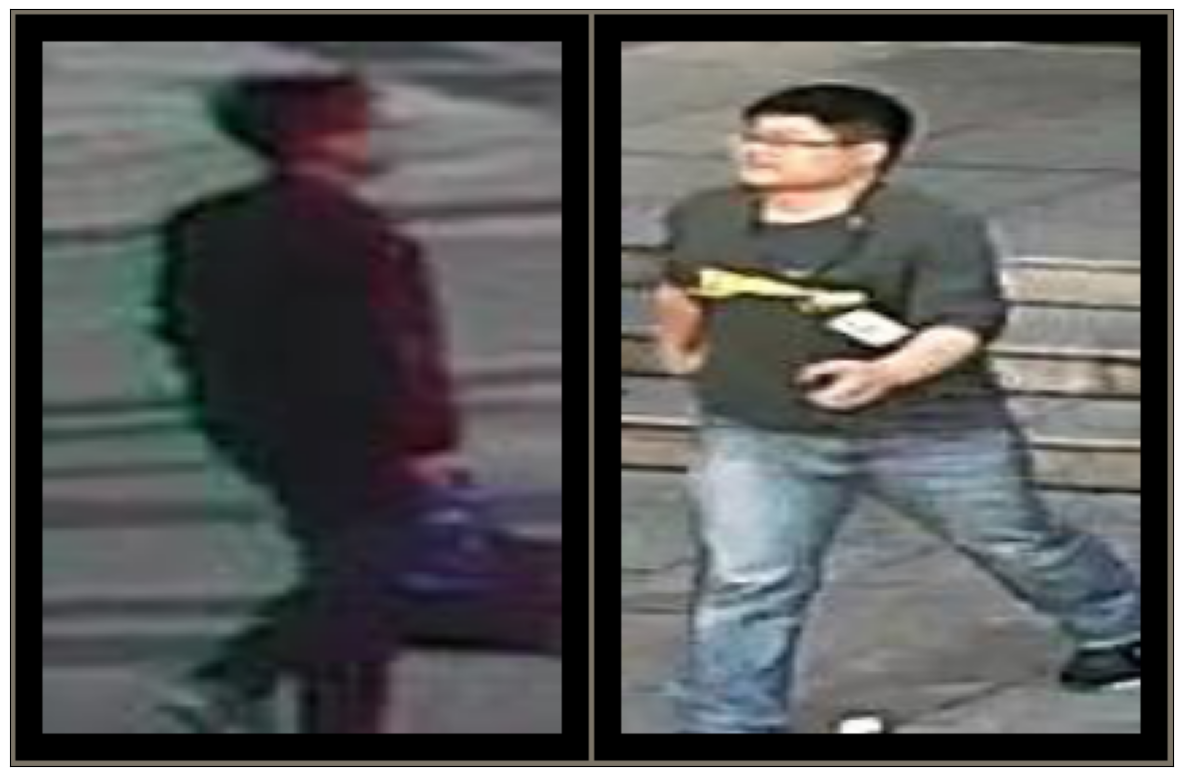

In [29]:
grid = vutils.make_grid(image,nrow =4//2)
show_grid(grid)
labels

In [10]:
model = VisionGuard()

/opt/conda/envs/cv/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [14]:
weights_path = "../output/swin_transformer_combined.pth"
model.load_state_dict(torch.load(weights_path))
model = model.to(get_device())

In [45]:
out ,_ = model.forward(image.to(dtype=torch.float,device = get_device()))

In [46]:
out = torch.sigmoid(out)
out[out >=0.5] =1
out[out<0.5]=0

In [47]:
out = out.detach().cpu().numpy()
out 

array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [51]:
out.shape

(2, 26)

In [52]:
out = np.where(out ==1)

In [57]:
out

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([ 2,  5, 14, 22,  2,  4,  5,  8, 14, 22]))

In [63]:
for i,x in zip(out[0],out[1]):
    print(i, test_dataset.l2c(x))
    
   

0 Age18-60
0 Side
0 LongSleeve
0 Trousers
1 Age18-60
1 Front
1 Side
1 Glasses
1 LongSleeve
1 Trousers


In [67]:
labels = labels.detach().cpu().numpy()
labels = np.where(labels ==1)
for i,x in zip(labels[0],labels[1]):
    print(i, test_dataset.l2c(x))

0 Age18-60
0 Side
0 Glasses
0 HandBag
0 LongSleeve
0 Trousers
1 Age18-60
1 Front
1 Glasses
1 ShortSleeve
1 UpperLogo
1 Trousers
